In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.font_manager import fontManager
mpl.rc('font',family='DFYuanLight-B5')
mpl.rcParams['axes.unicode_minus']=False
import wget
#url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
#df = pd.read_csv(url)
#df.to_csv("Salary_Data.csv",index = False)
df = pd.read_csv("Salary_Data.csv")
x = df['YearsExperience']
y = df['Salary']

In [169]:
# 微分後結果
w = 10
b = 10
def compute_gradient(x,y,w,b):
    w_gradient = (x*(w*x+b -y)).mean()
    b_gradient = ((w*x+b -y)).mean()
    return w_gradient,b_gradient

In [170]:
print(*compute_gradient(x,y,20,10))

268.54757575757577 35.084848484848486


In [171]:
def compute_cost(x,y,w,b):
    y_pred = w*x+b
    cost = (y-y_pred)**2
    cost = cost.sum() / len(x)
    return cost

In [172]:
def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter=1000):

  c_hist = []
  w_hist = []
  b_hist = []

  w = w_init
  b = b_init

  for i in range(run_iter):
    w_gradient, b_gradient = gradient_function(x, y, w, b)

    w = w - w_gradient*learning_rate
    b = b - b_gradient*learning_rate
    cost = cost_function(x, y, w, b)

    w_hist.append(w)
    b_hist.append(b)
    c_hist.append(cost)

    if i%p_iter == 0:
      print(f"Iteration {i:5} : Cost {cost: .4e}, w: {w: .2e}, b: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e}")

  return w, b, w_hist, b_hist, c_hist

In [173]:
w_init = 0
b_init = 0
learning_rate = 1.0e-3
run_iter = 20000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x, y, w_init, b_init, learning_rate,compute_cost, compute_gradient, run_iter)

Iteration     0 : Cost  5.6568e+03, w:  4.36e-01, b:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01
Iteration  1000 : Cost  1.4097e+02, w:  1.21e+01, b:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00
Iteration  2000 : Cost  9.6063e+01, w:  1.14e+01, b:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00
Iteration  3000 : Cost  6.9732e+01, w:  1.09e+01, b:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00
Iteration  4000 : Cost  5.4293e+01, w:  1.05e+01, b:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00
Iteration  5000 : Cost  4.5241e+01, w:  1.02e+01, b:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00
Iteration  6000 : Cost  3.9933e+01, w:  9.91e+00, b:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00
Iteration  7000 : Cost  3.6821e+01, w:  9.73e+00, b:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00
Iteration  8000 : Cost  3.4996e+01, w:  9.59e+00, b:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01
Iteration  9000 : C

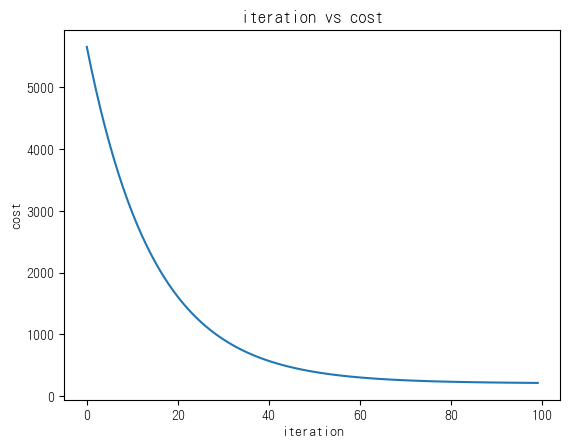

In [174]:
plt.plot(np.arange(0,100),c_hist[:100])
plt.title('iteration vs cost')
plt.ylabel('cost')
plt.xlabel('iteration')
plt.show()

In [175]:
print(f'最終w b = ({w_final} {b_final})')

最終w b = (9.142528600076414 27.885958900526827)


In [176]:
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

costs

array([[543097.74787879, 541777.28121212, 540458.81454545, ...,
        320651.34787879, 319726.88121212, 318804.41454545],
       [534727.50939394, 533416.80636364, 532108.10333333, ...,
        314214.30939394, 313299.60636364, 312386.90333333],
       [526422.82181818, 525121.88242424, 523822.9430303 , ...,
        307842.82181818, 306937.88242424, 306034.9430303 ],
       ...,
       [164229.90787879, 164842.64121212, 165457.37454545, ...,
        324557.10787879, 325565.84121212, 326576.57454545],
       [168838.74939394, 169461.24636364, 170085.74333333, ...,
        331099.14939394, 332117.64636364, 333138.14333333],
       [173513.14181818, 174145.40242424, 174779.6630303 , ...,
        337706.74181818, 338735.00242424, 339765.2630303 ]],
      shape=(201, 201))

In [183]:
w_init = -100
b_init = -100
learning_rate = 5.9e-2
run_iter = 1000
w_final,b_final,w_hist,b_hist,c_hist = gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,comput_gradient,run_iter)

Iteration     0 : Cost  5.1846e+05, w:  1.48e+02, b: -6.10e+01, w_gradient: -4.20e+03, b_gradient: -6.61e+02


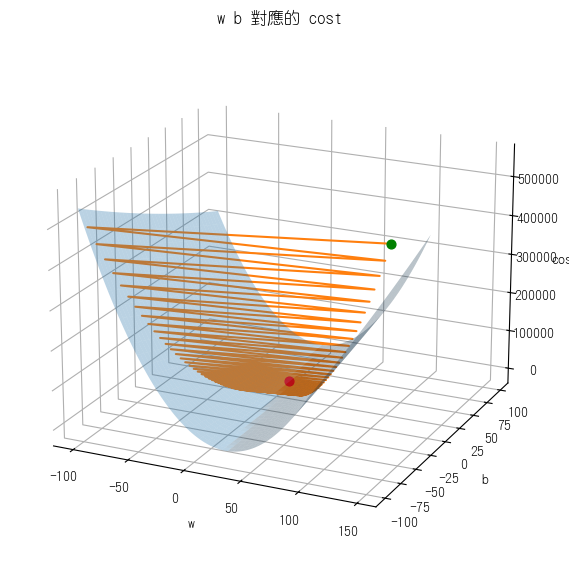

In [184]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.view_init(20, -65)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0))

b_grid, w_grid = np.meshgrid(bs, ws)
# https://wangyeming.github.io/2018/11/12/numpy-meshgrid/

ax.plot_surface(w_grid, b_grid, costs, alpha=0.3)

ax.set_title("w b 對應的 cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40)
ax.scatter(w_hist[0], b_hist[0], c_hist[0], color="green", s=40)
ax.plot(w_hist, b_hist, c_hist)

plt.show()

In [179]:
print(f"年資3.5     預測薪水{w_final*3.5 + b_final:.1f}K")
print(f"年資3.5     預測薪水{w_final*5.9 + b_final:.1f}K")

年資3.5     預測薪水nanK
年資3.5     預測薪水nanK
